In [134]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
#Load Dataset
dataset = pd.read_csv(r'C:\Python\ChannelDataset.csv')
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
0,12669,9656,7561,214,2674,1338,3,2
1,7057,9810,9568,1762,3293,1776,3,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,3,1
4,22615,5410,7198,3915,1777,5185,3,2


In [136]:
#Tukey Method

# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('Channel', axis=1),0,list(dataset.drop('Channel', axis=1)))
dataset.drop('Channel', axis=1).loc[Outliers_to_drop]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
29,43088,2100,2609,1200,1107,823,3
39,56159,555,902,10002,212,2916,3
47,44466,54259,55571,7782,24171,6465,3
52,40721,3916,5876,532,2587,1278,3
87,43265,5025,8117,6312,1579,14351,3
...,...,...,...,...,...,...,...
202,25203,11487,9490,5065,284,6854,1
218,18,7504,15205,1285,4797,6372,1
372,3884,3801,1641,876,397,4829,3
409,8708,3634,6100,2349,2123,5137,3


In [137]:
#Create New Dataset without Outliers
dataset=dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             332 non-null    int64
 1   Milk              332 non-null    int64
 2   Grocery           332 non-null    int64
 3   Frozen            332 non-null    int64
 4   Detergents_Paper  332 non-null    int64
 5   Delicassen        332 non-null    int64
 6   Region            332 non-null    int64
 7   Channel           332 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [138]:
dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,9547.397590,4105.180723,5875.614458,1863.048193,1958.975904,1016.602410,2.539157,1.286145
std,8161.831206,3363.303146,5038.930756,1707.890373,2347.470292,824.356784,0.782148,0.452640
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000,1.000000
25%,2989.750000,1352.500000,2011.500000,582.000000,231.750000,360.750000,2.000000,1.000000
50%,7483.500000,3087.000000,3835.500000,1270.500000,715.500000,774.000000,3.000000,1.000000
75%,13987.250000,6251.750000,8928.500000,2587.500000,3461.250000,1456.000000,3.000000,2.000000
max,37036.000000,14982.000000,22272.000000,7683.000000,8969.000000,3637.000000,3.000000,2.000000


In [139]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
SpendingReport = pp.ProfileReport(dataset)
SpendingReport.to_file('spending.html')
display(IFrame('spending.html', width=900, height=350))

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

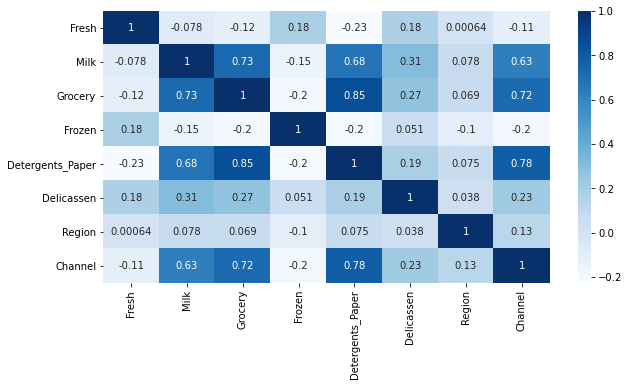

In [140]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [141]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('Detergents_Paper', 'Grocery')]


Class Split
1    237
2     95
Name: Channel, dtype: int64


Text(0, 0.5, 'Count')

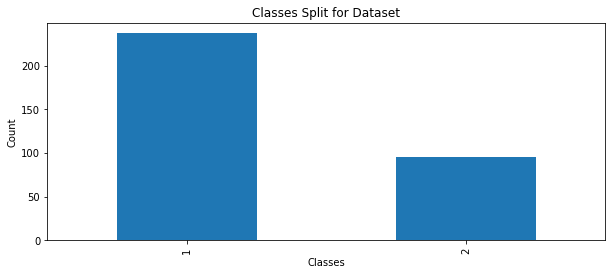

In [142]:
#Class Balance
print('Class Split')
print(dataset['Channel'].value_counts())
dataset['Channel'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [143]:
#Define x and y variable
x = dataset.drop('Channel',axis=1).to_numpy()
y = dataset['Channel'].to_numpy()

#Prepare for Models for Comparison

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

x_2 = sc.transform(x)

In [144]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]


pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])  
pipeline.insert(1,pipe_rdf)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',max_iter=1000,
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridrdf = {}
modelpara.insert(0,param_gridrdf)


param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [145]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()


 Random Forest


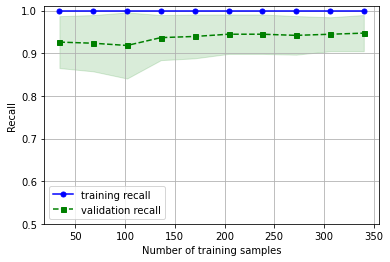

Logistic Regression Learning Curve


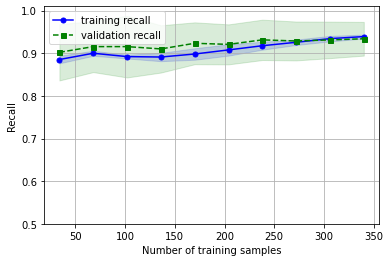

In [146]:
#Plot Learning Curve
print('\n Random Forest')
plot_learning_curves(pipe_rdf)
print('Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
Logistic Regression 0.90 +/- 0.05
Random Forest 0.91 +/- 0.04




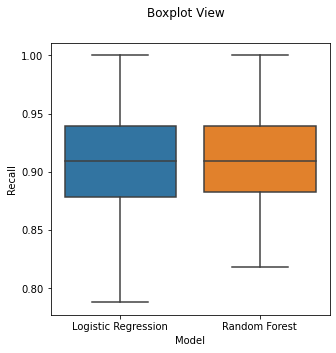

In [147]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',pipe_logreg))
models.append(('Random Forest',pipe_rdf))


#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [148]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: RandomForestClassifier(random_state=100)

Best Parameters: {}

 [[44  4]
 [ 3 16]]

               precision    recall  f1-score   support

   Outcome 0       0.94      0.92      0.93        48
   Outcome 1       0.80      0.84      0.82        19

    accuracy                           0.90        67
   macro avg       0.87      0.88      0.87        67
weighted avg       0.90      0.90      0.90        67

ROC Curve


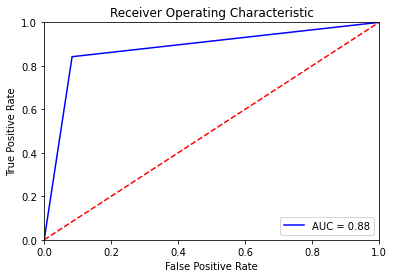


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)

Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2'}

 [[42  6]
 [ 2 17]]

               precision    recall  f1-score   support

   Outcome 0       0.95      0.88      0.91        48
   Outcome 1       0.74      0.89      0.81        19

    accuracy                           0.88        67
   macro avg       0.85      0.88      0.86        67
weighted avg       0.89      0.88      0.88        67

ROC Curve


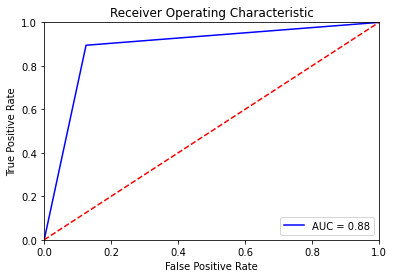

In [149]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

In [150]:
#Next Steps - Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10)
clf.fit(x_train2,y_train_smt)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = dataset.drop('Channel',axis=1).columns[feature_idx]
print('\nKey Features:',feature_name)


Key Features: Index(['Grocery', 'Detergents_Paper'], dtype='object')


In [151]:
#selecting important features
dataset= dataset[['Grocery', 'Detergents_Paper','Channel']]

In [152]:
dataset

,Grocery,Detergents_Paper,Channel
0,7561,2674,2
1,9568,3293,2
2,4221,507,1
3,5126,1795,2
4,6975,3140,2
...,...,...,...
327,4754,1328,1
328,1493,356,1
329,7994,2371,1
330,2232,168,1


In [153]:
#Define x and y variable
x = dataset.drop('Channel',axis=1).to_numpy()
y = dataset['Channel'].to_numpy()

#Prepare for Models for Comparison

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

x_2 = sc.transform(x)

In [154]:
#Prepare Models 
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [155]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]


pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])  
pipeline.insert(1,pipe_rdf)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',max_iter=1000,
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridrdf = {}
modelpara.insert(0,param_gridrdf)


param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [156]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()


 Random Forest


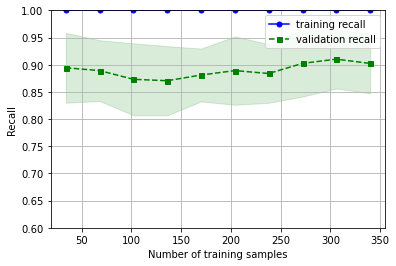


 Logistic Regression Learning Curve


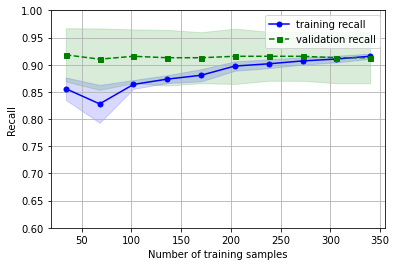

In [157]:
#Plot Learning Curve
print('\n Random Forest')
plot_learning_curves(pipe_rdf)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
Logistic Regression 0.89 +/- 0.05
Random Forest 0.88 +/- 0.05
GBC 0.88 +/- 0.05




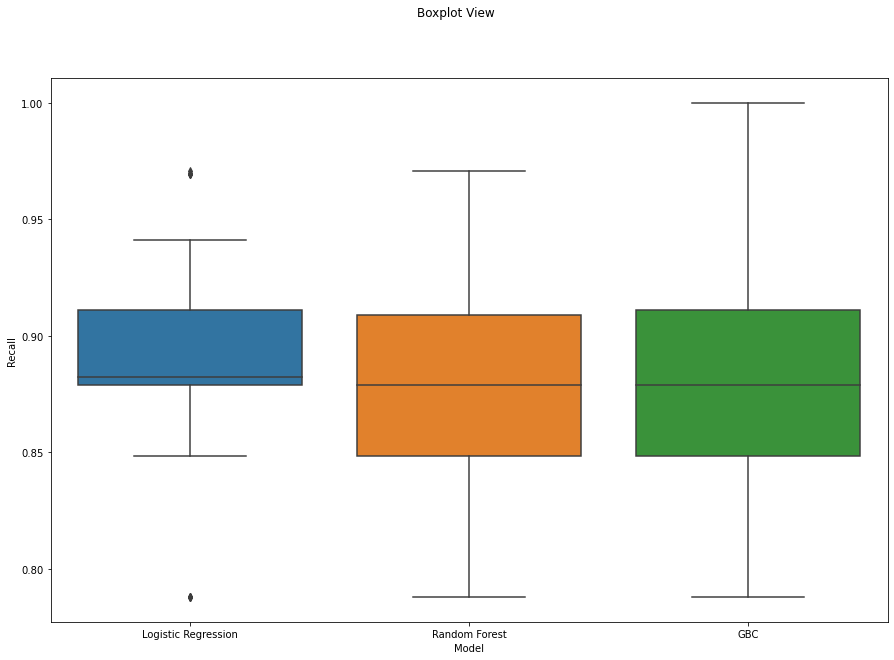

In [159]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='lbfgs',class_weight='balanced',
                                                        random_state=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))

models.append(('GBC',GradientBoostingClassifier(random_state=100)))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [160]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train2,y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    predict = model.predict(x_test2)
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,predict))  
    print('\n',classification_report(y_test,predict,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(predict)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: RandomForestClassifier(random_state=100)

Best Parameters: {}

 [[44  4]
 [ 3 16]]

               precision    recall  f1-score   support

   Outcome 0       0.94      0.92      0.93        48
   Outcome 1       0.80      0.84      0.82        19

    accuracy                           0.90        67
   macro avg       0.87      0.88      0.87        67
weighted avg       0.90      0.90      0.90        67

ROC Curve


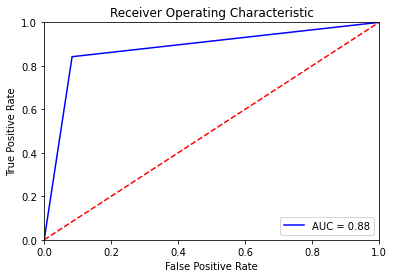


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)

Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}

 [[42  6]
 [ 3 16]]

               precision    recall  f1-score   support

   Outcome 0       0.93      0.88      0.90        48
   Outcome 1       0.73      0.84      0.78        19

    accuracy                           0.87        67
   macro avg       0.83      0.86      0.84        67
weighted avg       0.87      0.87      0.87        67

ROC Curve


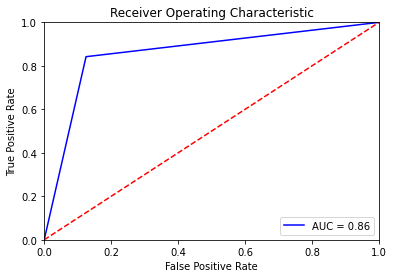

In [161]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

In [162]:
#Script for Models

from sklearn.metrics import classification_report, confusion_matrix  

models2 ={'Logistic Regression':LogisticRegression(solver='lbfgs',
                                                   class_weight='balanced',max_iter = 1000,random_state=100),
          'Random Forest':RandomForestClassifier(n_estimators=100,random_state=100),
          
          'GBC':GradientBoostingClassifier(random_state=100)}

for name, model in models2.items():
    model.fit(x_train2,y_train_smt)
    predict = model.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print('\n',confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict)) 


Estimator: Logistic Regression

 [[42  6]
 [ 3 16]]
              precision    recall  f1-score   support

           1       0.93      0.88      0.90        48
           2       0.73      0.84      0.78        19

    accuracy                           0.87        67
   macro avg       0.83      0.86      0.84        67
weighted avg       0.87      0.87      0.87        67


Estimator: Random Forest

 [[44  4]
 [ 3 16]]
              precision    recall  f1-score   support

           1       0.94      0.92      0.93        48
           2       0.80      0.84      0.82        19

    accuracy                           0.90        67
   macro avg       0.87      0.88      0.87        67
weighted avg       0.90      0.90      0.90        67


Estimator: GBC

 [[43  5]
 [ 3 16]]
              precision    recall  f1-score   support

           1       0.93      0.90      0.91        48
           2       0.76      0.84      0.80        19

    accuracy                           0.88  

In [163]:
#Create Voting Model - Sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

estimators = []

model1 = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000,
                            random_state=100)
estimators.append(('Logistic', model1))

model2 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators.append(('Random Forest', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train2,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
LogisticRegression 0.89
RandomForestClassifier 0.85
VotingClassifier 0.89


In [164]:
#Create Stacking Model-Sklearn
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

#Identify Models
lr = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000,
                        random_state=100)

estimators2 = []

mod1 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators2.append(('Random Forest', mod1))

mod2 = BaggingClassifier(random_state=100)
estimators2.append(('Bagging', mod2))

#Create Stacking Classifier
stackmod=StackingClassifier(estimators=estimators2,
                             final_estimator=lr)

scoring2 = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

print('\nStacking Model')
for clf in (mod1,mod2,stackmod):
    rkfcv2= clf.fit(x_train2,y_train_smt)
    ens_rkf2 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv2 = cross_validate(rkfcv2, x_2, y, scoring=scoring2, cv=ens_rkf2)
    print(clf.__class__.__name__,round(rKFcv2['test_rec_macro'].mean(),2)) 


Stacking Model
RandomForestClassifier 0.85
BaggingClassifier 0.84
StackingClassifier 0.87
